In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split

#define sigmoid funciton
def sigmoid(w,x):
    #calculate y
    y=np.dot(x,w)
    #use y to calculate result
    result=1/(1+np.exp(-y))
    return result

#define loss function
def loss(w,x,y):
    #get data volume
    data_volume=x.shape[0]
    #calculate positive probability
    positive_probability=sigmoid(w,x)
    #calculate negative probability using positive probability
    negative_probability=1-positive_probability
    #sum the loss
    loss_total=np.dot(y.T,np.log(positive_probability))+np.dot((1-y).T,np.log(negative_probability))
    #mean the loss
    result=-loss_total/data_volume
    return result
  
#define gradient calculating function
def gradient(w,x,y):
    #get data volume
    data_volume=x.shape[0]
    #calculate positive probability
    positive_probability=sigmoid(w,x)
    #calculate gradient
    grad=np.dot((positive_probability-y).T,x).T/data_volume
    return grad


#define predict function
def predict(threshold,w,x):
    #calculate the predict result
    y_predict=sigmoid(w,x)
    y_predict=y_predict.reshape((-1,1))
    #mark the sample whose predict scores greater than the threshold as positive, on the contrary as negative
    for yp in range(len(y_predict)):
        if(y_predict[yp]>=threshold):
            y_predict[yp]=1
        else:
            y_predict[yp]=0
    
    return y_predict

#define accuracy function
def accuracy(threshold,w,x,y):
    #get the prediction result
    y_predict=predict(threshold,w,x)
    #use a counter to count the number of correct prediction
    correct_counter=0
    #compare the prediction result and the truth
    for i in range(len(y)):
        if y_predict[i]==y[i]:
            correct_counter=correct_counter+1
    
    #calculate the accuracy
    accuracy=correct_counter/len(y)
    return accuracy

#define loss graph drawing functioon
def show_graph():
    #log scale
    plt.yscale('log')
    #add label
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    #show legend
    plt.legend()
    #set title
    plt.title('Loss-Iterations Graph')
    plt.show()

#define RMSProp optimization method
def RMSProp_Optimization(threshold,w,x_train,y_train,x_test,y_test,runs):
    #print a signal
    print('RMSProp Optimization')
    #set parameter
    learning_rate=0.02
    gama=0.9
    e=0.0000001
    #initialize medium variable
    G=0  
    #initialize container for loss
    test_losses=np.zeros(runs)
    #optimize
    for i in range(runs):
         #generate random integer
        index=np.arange(5000)
        np.random.shuffle(index)
        #get a batch of stochastic training sample
        x_train_part=x_train[index]
        y_train_part=y_train[index]
        #calculate gradient
        grad=gradient(w,x_train_part,y_train_part)
        G=gama*G+(1-gama)*np.dot(grad.T,grad)
        w=w-learning_rate/np.sqrt(G+e)*grad
        #calculate the loss
        error=loss(w,x_test,y_test)
        #save the loss in container
        test_losses[i]=error
        #log every 100 epochs
        if(i%100==99):
            #calculate the accuracy
            accur=accuracy(threshold,w,x_test,y_test)
            print("epochs "+str(i+1)+" Accuracy: "+str(accur))
    #draw graph of loss
    x_axis=np.arange(runs)
    plt.plot(x_axis,test_losses,'r',label='RMSProp')
    return w

#define AdaDelta optimazation method
def AdaDelta_Optimization(threshold,w,x_train,y_train,x_test,y_test,runs):
    #print a signal
    print('AdaDelta Optimization')
    #set parameter
    gama=0.80
    e=0.0001
    #initialize medium variables
    G=0
    delta_t=0
    #initialize container for loss
    test_losses=np.zeros(runs)
    #optimize
    for i in range(runs):
         #generate random integer
        index=np.arange(5000)
        np.random.shuffle(index)
        #get a batch of stochastic training sample
        x_train_part=x_train[index]
        y_train_part=y_train[index]
        #calculate gradient
        grad=gradient(w,x_train_part,y_train_part)
        #update G
        G=gama*G+(1-gama)*np.dot(grad.T,grad)
        #calculate step
        step=-np.sqrt(delta_t+e)/np.sqrt(G+e)*grad
        #update weight vector
        w=w+step
        #update delta_t
        delta_t=gama*delta_t+(1-gama)*np.dot(step.T,step)
        #calculate the loss
        error=loss(w,x_test,y_test)
        #save the loss in container
        test_losses[i]=error
        #log every 100 epochs
        if(i%100==99):
            #calculate the accuracy
            accur=accuracy(threshold,w,x_test,y_test)
            print("epochs "+str(i+1)+" Accuracy: "+str(accur))
    #draw graph of loss
    x_axis=np.arange(runs)
    plt.plot(x_axis,test_losses,'g',label='AdaDelta')
    return w
    
    

#define Adam optimization method
def Adam_Optimization(threshold,w,x_train,y_train,x_test,y_test,runs):
    #print a signal
    print('Adam Optimization')
    #set parameter
    belta=0.8
    gama=0.9
    learning_rate=0.1
    e=0.000001
    #initialize medium variables
    m=np.zeros_like(w)
    G=0
    #initialize container for loss
    test_losses=np.zeros(runs)
    #oprimazation
    for i in range(runs):
         #generate random integer
        index=np.arange(5000)
        np.random.shuffle(index)
        #get a batch of stochastic training sample
        x_train_part=x_train[index]
        y_train_part=y_train[index]
        #calculate gradient
        grad=gradient(w,x_train_part,y_train_part)
        #update m
        m=belta*m+(1-belta)*grad
        #update G
        G=gama*G+(1-gama)*np.dot(grad.T,grad)
        #calculate alpha
        alpha=learning_rate*np.sqrt(1-pow(gama,i+1))/(1-pow(belta,i+1))
        #update weight vector
        w=w-alpha/(np.sqrt(G+e))*m
        #calculate the loss
        error=loss(w,x_test,y_test)
        #save the loss in container
        test_losses[i]=error
        #log every 100 epochs
        if(i%100==99):
            #calculate the accuracy
            accur=accuracy(threshold,w,x_test,y_test)
            print("epochs "+str(i+1)+" Accuracy: "+str(accur))
    #draw graph of loss
    x_axis=np.arange(runs)
    plt.plot(x_axis,test_losses,'y',label='Adam')
    return w

#define NAG algorithm
def NAG_Optimization(threshold,w,x_train,y_train,x_test,y_test,runs):
    #print a signal
    print('NAG Optimization')
    #set parameter
    gama=0.9
    learning_rate=0.01
    #initialize medium variables
    v=np.zeros_like(w)
    #initialize container for loss
    test_losses=np.zeros(runs)
    #oprimize
    for i in range(runs):
         #generate random integer
        index=np.arange(5000)
        np.random.shuffle(index)
        #get a batch of stochastic training sample
        x_train_part=x_train[index]
        y_train_part=y_train[index]
        #calculate gradient
        grad=gradient(w,x_train_part,y_train_part)
        grad=grad+gama*v
        #update v
        v=gama*v+learning_rate*grad
        #update weight vector
        w=w-v
        #calculate the loss
        error=loss(w,x_test,y_test)
        #save the loss in container
        test_losses[i]=error
        #log every 100 epochs
        if(i%100==99):
            #calculate the accuracy
            accur=accuracy(threshold,w,x_test,y_test)
            print("epochs "+str(i+1)+" Accuracy: "+str(accur))
    #draw graph of loss
    x_axis=np.arange(runs)
    plt.plot(x_axis,test_losses,'b',label='NAG')
    return w

#define Momentum optimization method
def Momentum_Optimization(threshold,w,x_train,y_train,x_test,y_test,runs):
    #print a signal
    print('Momentum Optimization')
    #set parameter
    gama=0.9
    learning_rate=0.05
    #initialize medium variables
    v=np.zeros_like(w)
    #initialize container for loss
    test_losses=np.zeros(runs)
    #oprimize
    for i in range(runs):
         #generate random integer
        index=np.arange(5000)
        np.random.shuffle(index)
        #get a batch of stochastic training sample
        x_train_part=x_train[index]
        y_train_part=y_train[index]
        #calculate gradient
        grad=gradient(w,x_train_part,y_train_part)
        #update v
        v=gama*v+learning_rate*grad
        #update weight vector
        w=w-v
        #calculate the loss
        error=loss(w,x_test,y_test)
        #save the loss in container
        test_losses[i]=error
        #log every 100 epochs
        if(i%100==99):
            #calculate the accuracy
            accur=accuracy(threshold,w,x_test,y_test)
            print("epochs "+str(i+1)+" Accuracy: "+str(accur))
    #draw graph of loss
    x_axis=np.arange(runs)
    plt.plot(x_axis,test_losses,'c',label='Momentum')
    return w


RMSProp Optimization
epochs 100 Accuracy: 0.8304772434125668
epochs 200 Accuracy: 0.8469381487623611
epochs 300 Accuracy: 0.8468153061851238
epochs 400 Accuracy: 0.845771144278607
epochs 500 Accuracy: 0.845095510103802
epochs 600 Accuracy: 0.8449726675265647
epochs 700 Accuracy: 0.8449726675265647
epochs 800 Accuracy: 0.8445427185062343
epochs 900 Accuracy: 0.844419875928997
epochs 1000 Accuracy: 0.8443584546403784
Adam Optimization
epochs 100 Accuracy: 0.8463239358761747
epochs 200 Accuracy: 0.8436213991769548
epochs 300 Accuracy: 0.8428229224249125
epochs 400 Accuracy: 0.8428229224249125
epochs 500 Accuracy: 0.8427615011362939
epochs 600 Accuracy: 0.8427000798476753
epochs 700 Accuracy: 0.8427000798476753
epochs 800 Accuracy: 0.8427615011362939
epochs 900 Accuracy: 0.842577237270438
epochs 1000 Accuracy: 0.8426386585590566
AdaDelta Optimization
epochs 100 Accuracy: 0.8332412014004054
epochs 200 Accuracy: 0.8476752042257847
epochs 300 Accuracy: 0.8470609913395983
epochs 400 Accuracy: 

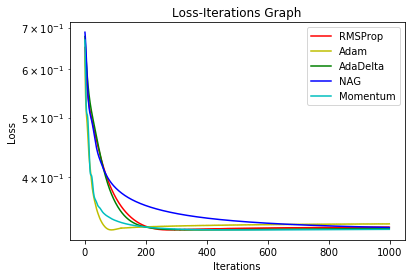

In [13]:
#load data
train_data=load_svmlight_file("a9a.txt")
test_data=load_svmlight_file("a9a.t",n_features=123)
#sperate features and labels
X_train,y_train=train_data[0],train_data[1]
X_test,y_test=test_data[0],test_data[1]
#change the range of y from [-1,1] to [0,1]
y_train=y_train/2+0.5
y_test=y_test/2+0.5
#change sparse martix to numpy array
X_train=X_train.toarray()
X_test=X_test.toarray()
#integrate features with bias
#create bias vector
X_train_bias=np.ones((X_train.shape[0],1))
X_test_bias=np.ones((X_test.shape[0],1))
#add bias column to features
X_train=np.hstack([X_train,X_train_bias])
X_test=np.hstack([X_test,X_test_bias])
#set parameter
epochs=1000
threshold=0.5
#initialize weight vector
w=np.zeros(X_train.shape[1])

#optimize by RMSProp algorithm
w1=RMSProp_Optimization(threshold,w,X_train,y_train,X_test,y_test,epochs)
#optimize by Adam algorithm
w2=Adam_Optimization(threshold,w,X_train,y_train,X_test,y_test,epochs)
#optimize by AdaDelta algorithm
w3=AdaDelta_Optimization(threshold,w,X_train,y_train,X_test,y_test,epochs)
#optimize by NAG algorithm
w4=NAG_Optimization(threshold,w,X_train,y_train,X_test,y_test,epochs)
#optimize by Momentum algorithm
w5=Momentum_Optimization(threshold,w,X_train,y_train,X_test,y_test,epochs)
#show the loss graph
show_graph()
